In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Problem 1

Use the natural embedding algorithm to create a bifurcation diagram for the differential equation

x = λx − x^3

This type of bifurcation is called a pitchfork bifurcation (you should see a pitchfork in your
diagram)

In [7]:
def EmbeddingAlg(param_list, guess, F):
    """This function is from the lab manual"""
    X = []
    for param in param_list:
        try:
            # Solve for x_value making F(x_value, param) = 0
            x_value = newton(F, guess, fprime=None, args=(param,), tol=1E-7, maxiter=50)
            # Record the solution and update guess for the next iteration
            X.append(x_value)
            guess = x_value
        except RuntimeError:
            # If Newton's method fails, return a truncated list of parameters
            # with the corresponding x values.
            return param_list[:len(X)], X
    # Return the list of parameters and the corresponding x values.
    return param_list, X

def F(x, lmbda):
    """Right side of ODE"""
    return lmbda*x-x**3

# Calculate the curves for the bifurcation diagram 
C1, X1 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), np.sqrt(5), F)
C2, X2 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), -np.sqrt(5), F)
C3, X3 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 0, F)

# Generate bifurcation diagram 
plt.plot(C1, X1)
plt.plot(C2, X2)
plt.plot(C3, X3)
plt.xlabel("$\lambda$")
plt.ylabel("$x$", rotation = 0)
plt.title("Bifurcation For $x'=\lambda x - x^3$")
plt.show()

# Problem 2
Create bifurcation diagrams for the diffrential equation

x = η + λx − x^3,

where η = −1, −.2, .2 and 1. Notice that when η = 0 you can see the pitchfork bifurcation of
the previous problem. T

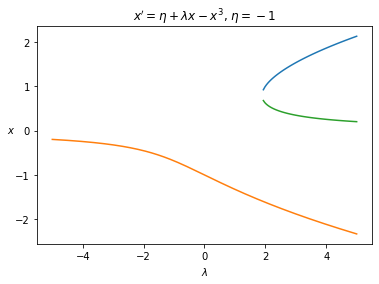

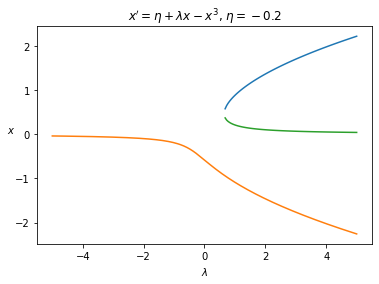

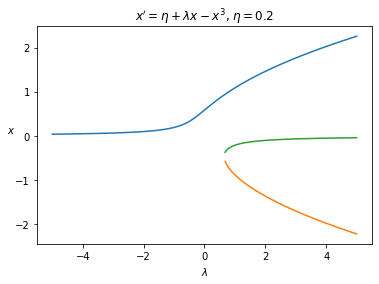

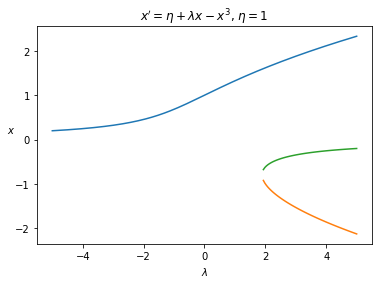

In [8]:
# These four functions define the right side of the ODE for various eta values 
def F0(x, lmbda):
    return -1+lmbda*x-x**3
def F1(x, lmbda):
    return -0.2+lmbda*x-x**3
def F2(x, lmbda):
    return 0.2+lmbda*x-x**3
def F3(x, lmbda):
    return 1+lmbda*x-x**3

# Initialize lists for colors, functions, and eta values
colors = ["blue", "orange", "green"]
funcs = [F0, F1, F2, F3]
etas = [-1, -0.2, 0.2, 1]

# Loop through each function and eta value
for fun, eta in zip(funcs, etas):
    # Calculate the curves for the bifurcation diagram
    C1, X1 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), np.sqrt(5), fun)
    C2, X2 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), -np.sqrt(5), fun)
    C3, X3 = EmbeddingAlg(np.flip(np.linspace(-5, 5, 200)), 0, fun)
    Cs, Xs = [C1, C2, C3], [X1, X2, X3]
    
    # Generate the bifurcation diagram for each function and eta value 
    for c, x, col in zip(Cs, Xs, colors):
        plt.plot(c, x)
        
    plt.xlabel("$\lambda$")
    plt.ylabel("$x$", rotation = 0)
    plt.title(f"$x'=\eta + \lambda x - x^3$, $\eta = {eta}$")
    plt.show()

# Problem 3 - Hysteresis

Reproduce the bifurcation diagram for the differential equation

dx/dτ = rx(1 − x/k) −x^2/(1 + x^2),

where r = 0.56

In [71]:
def F(x, k):
    """Right side of ODE"""
    r = 0.56
    return r*x*(1-(x/k))-(x**2)/(1+x**2)

# Calculate the curves for the bifurcation diagram 
C1, X1 = EmbeddingAlg(np.linspace(15, 1, 200), 10, F)
C2, X2 = EmbeddingAlg(np.linspace(2, 15, 200), .25, F)
C3, X3 = EmbeddingAlg(np.linspace(8.5, 6, 200), 2.5, F)
C4, X4 = EmbeddingAlg(np.linspace(8.5, 10, 200), 1.5, F)

# Generate plot
plt.plot(C1, X1, color = "black", linewidth = 3, label = "Stable Equilibria")
plt.plot(C2, X2, color = "black", linewidth = 3)
plt.plot(C3, X3, "--", color = "green", linewidth = 2, label = "Unstable Equilibria")
plt.plot(C4, X4, "--", color = "green", linewidth = 2)
plt.plot(6.45, 3, "o", color = "black", markersize = 10)
plt.plot(10, 1.2, "o", color = "black", markersize = 10)
plt.legend()
plt.title("Bifurcation Diagram for BudWorms")
plt.xlabel("$k$")
plt.ylabel("$x$", rotation = 0)
plt.show()